In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Conjunto de dados

In [38]:
minutes_watched_2021_paid_0 = pd.read_csv(r'database\minutes_watched_2021_paid_0.csv')
minutes_watched_2022_paid_0 = pd.read_csv(r'database\minutes_watched_2022_paid_0.csv')
minutes_watched_2021_paid_1 = pd.read_csv(r'database\minutes_watched_2021_paid_1.csv')
minutes_watched_2022_paid_1 = pd.read_csv(r'database\minutes_watched_2022_paid_1.csv')


In [39]:
minutes_watched_2021_paid_0.head()

,student_id,minutes_watched,paid_in_q2
0,66,0.7167,0
1,132,71.9167,0
2,560,1.3667,0
3,606,18.1167,0
4,615,18.9333,0


In [40]:
minutes_watched_2022_paid_0.head()

,student_id,minutes_watched,paid_in_q2
0,67,27.0333,0
1,560,1.2167,0
2,1520,2.1000,0
3,1907,4.6833,0
4,2759,0.2500,0


In [41]:
minutes_watched_2021_paid_1.head()

,student_id,minutes_watched,paid_in_q2
0,6,162.0667,1
1,516,92.5333,1
2,520,182.3667,1
3,523,1322.2500,1
4,594,3.7333,1


In [42]:
minutes_watched_2022_paid_1.head()

,student_id,minutes_watched,paid_in_q2
0,6,134.1667,1
1,389,0.1500,1
2,616,464.0667,1
3,618,1667.0500,1
4,666,2.8333,1


## Verificando distribuição do tempo assistido

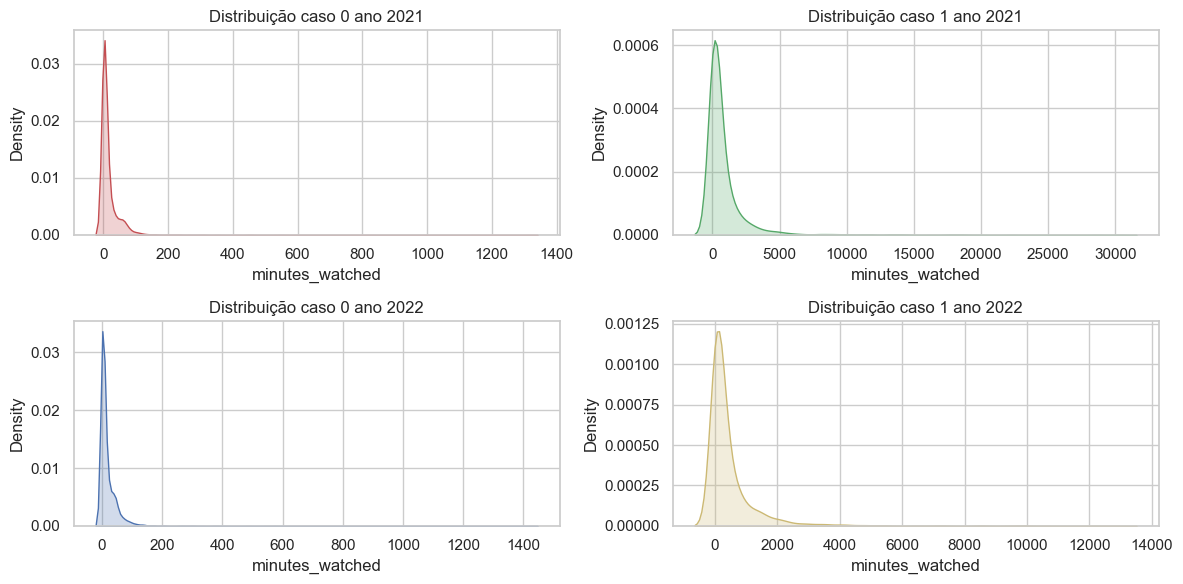

In [43]:
# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Plotar os gráficos
plt.figure(figsize=(12, 6))

# Primeiro subplot
plt.subplot(2, 2, 1)
sns.kdeplot(data=minutes_watched_2021_paid_0['minutes_watched'], fill=True, color="r")
plt.title('Distribuição caso 0 ano 2021')

# Segundo subplot
plt.subplot(2, 2, 2)
sns.kdeplot(data=minutes_watched_2021_paid_1['minutes_watched'], fill=True, color="g")
plt.title('Distribuição caso 1 ano 2021')

# Terceiro subplot
plt.subplot(2, 2, 3)
sns.kdeplot(data=minutes_watched_2022_paid_0['minutes_watched'], fill=True, color="b")
plt.title('Distribuição caso 0 ano 2022')

# Quarto subplot
plt.subplot(2, 2, 4)
sns.kdeplot(data=minutes_watched_2022_paid_1['minutes_watched'], fill=True, color="y")
plt.title('Distribuição caso 1 ano 2022')

plt.tight_layout()
plt.show()


Nos 4 casos a distribuição de dados dos minutos assistidos(minutes_watched) mostra-se uma normal com cauda para direita, ou seja o caso em que a média é maior que a mediana, esse efeito provavelmente é causado por pertencimento de outliers 

In [44]:
minutes_watched_2021_paid_0['minutes_watched'].describe()

count    5185.000000
mean       16.622260
std        44.242401
min         0.033300
25%         0.416700
50%         2.816700
75%        16.000000
max      1317.533300
Name: minutes_watched, dtype: float64

In [45]:
minutes_watched_2021_paid_1['minutes_watched'].describe()

count     2454.000000
mean       891.120403
std       2098.673291
min          0.050000
25%         40.562525
50%        259.108300
75%        847.437525
max      30265.200000
Name: minutes_watched, dtype: float64

In [46]:
minutes_watched_2022_paid_0['minutes_watched'].describe()

count    5950.000000
mean       18.408028
std        40.135728
min         0.033300
25%         0.850000
50%         5.108350
75%        21.795825
max      1426.666700
Name: minutes_watched, dtype: float64

In [47]:
minutes_watched_2022_paid_1['minutes_watched'].describe()

count     2891.000000
mean       495.954687
std       1055.035249
min          0.050000
25%         34.691700
50%        144.916700
75%        492.966700
max      12866.666700
Name: minutes_watched, dtype: float64

 Confirmando para os valores numéricos a média de todas as distribuições se encontra no terceiro quartil(correspondente a coluna de 75%) e o valor máximo de cada coluna está em um número bem maior que a média.

## Removendo outliers
A partir do EDA feito, mostrou-se necessário realizar a retirada de outliers para fazer uma análise com esses dados(complementar depois)

In [48]:
# Definir uma função para retirar os dados de forma a manter somente até 0 99percentil
def remocao_outlier(df, column_name):
    # Calcular o 99 percentil da coluna
    percentile_99 = df[column_name].quantile(0.99)
    # Filtrar do conjunto de dados
    df_filtered = df[df[column_name] <= percentile_99]
    return df_filtered


In [49]:
minutes_watched_2021_paid_0_no_outliers = remocao_outlier(minutes_watched_2021_paid_0,"minutes_watched")
minutes_watched_2021_paid_1_no_outliers = remocao_outlier(minutes_watched_2021_paid_1,"minutes_watched")
minutes_watched_2022_paid_0_no_outliers = remocao_outlier(minutes_watched_2022_paid_0,"minutes_watched")
minutes_watched_2022_paid_1_no_outliers = remocao_outlier(minutes_watched_2022_paid_1,"minutes_watched")

## Passando os dados ajustados para csv

In [54]:
minutes_watched_2021_paid_0_no_outliers.describe()

,student_id,minutes_watched,paid_in_q2
count,5133.000000,5133.000000,5133.0
mean,134416.020846,13.646802,0.0
std,44774.944162,23.142448,0.0
min,9.000000,0.033300,0.0
25%,148529.000000,0.416700,0.0
50%,151601.000000,2.716700,0.0
75%,155391.000000,14.833300,0.0
max,158768.000000,146.033300,0.0


In [52]:
minutes_watched_2021_paid_0_no_outliers.to_csv(r'database\minutes_watched_2021_paid_0_no_outliers.csv', index=False)
minutes_watched_2022_paid_0_no_outliers.to_csv(r'database\minutes_watched_2022_paid_0_no_outliers.csv', index=False)
minutes_watched_2021_paid_1_no_outliers.to_csv(r'database\minutes_watched_2021_paid_1_no_outliers.csv', index=False)
minutes_watched_2022_paid_1_no_outliers.to_csv(r'database\minutes_watched_2022_paid_1_no_outliers.csv', index=False)